# Основы программирования в Python

*Семинар по регрессии, Максим Першин  *

## Правила игры и организационные моменты

* В ходе курса мы выдадим несколько домашних заданий. Каждое задание будет представлять собой набор данных и тетрадку наподобие этой, в которой вам самим нужно будет выполнить некоторые задания. Тетрадка с решениями должна быть исполняемой, то есть, если запустить все ячейки от начала до конца, ошибок (из-за которых исполнение остановится) быть не должно.
  + Задачи, для решения которых предоставлен неработающий код (код, который невозможно запустить из-за наличия грубых ошибок/опечаток), не засчитываются, даже если при этом зафиксирован верный результат.
  + Если при проверке работ установлен факт нарушения академической этики, студент получает оценку «0» за данную работу. Работа студента, предоставившего свою работу для списывания, также аннулируется.

## Самостоятельный поиск информации

Не у всех задач, которые вам встретятся, есть готовые решения и, тем более, не ко всем вас будут детально готовить. В течение курса вам придется искать много информации самостоятельно — это один из ключевых навыков любой современной профессии. Чтобы искать эффективно, не набирайте в поиске просто формулировку задачи. Подумайте, какое **конкретное** действие вам нужно сделать и какого именно знания вам для этого не хватает, и сформулируйте этот запрос. Лучше всего писать запрос сразу **на английском** — глобальное сообщество программистов и аналитиков (да и в любой другой области) **гораздо** шире, чем русскоязычное.

**Пример:** Допустим, вам нужно, как в семинаре, показать студентов с оценкой по английскому выше 7 и по мат. анализу выше 6. Вы помните, как выбирать строки по условию, но не представляете, что делать, если условий несколько.

*Очень плохой запрос:* «Сколько студентов имеют выше 7 по английскому языку и выше 6 по мат. анализу python»

*Плохой запрос:* «pandas выбрать строки по нескольким условиям»

*Хороший запрос:* «pandas select rows by multiple conditions»

По хорошему запросу ответ находится с первой ссылки. Запрос на русском плохой, потому что первые результаты в этом случае — машинные переводы вопросов со StackOverflow, а не оригинальный русскоязычный контент.

### Полезные ссылки

* https://google.com/
* https://stackoverflow.com/

Если у вас не получилось найти гайд/туториал/разбор вашего вопроса, это не повод отчаиваться. Ответ может прятаться в документации к библиотеке. Читать документацию совсем не страшно, и там тоже бывают очень подробные примеры.

* https://docs.python.org/3/
* https://pandas.pydata.org/pandas-docs/stable/
* https://docs.scipy.org/doc/numpy/reference/
* https://matplotlib.org/contents.html
* http://scikit-learn.org/stable/documentation.html

---

## Оптимизация при помощи градиентного спуска. Задача регрессии.

Для работы нам понадобятся некоторые библиотеки: 
* `Pandas` - библиотека для удобной работы с таблицами;
* `NumPy` - библиотека для работы с массивами;
* `scikit-learn` - библиотека, которая содержит реализации множества алгоритмов машинного обучения;
* `Matplotlib` - библиотека для построения графиков.

In [246]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Визуализация градиентного спуска для функции с двумя переменными:

Для примера визуализации возьмем функцию: $f(x,y) = x ^ 2 + 5sin(x) + y ^ 2 + 5sin(y)$

In [2]:
f = lambda x, y: x ** 2 + 5 * np.sin(x) + y ** 2 + 5 * np.sin(y)

Тогда её частные производные равны:

$\frac{df}{dx} = 2x + 5cos(x)$

$\frac{df}{dy} = 2y + 5cos(y)$

In [3]:
df_x = lambda x: 2 * x + 5 * np.cos(x)
df_y = lambda y: 2 * y + 5 * np.cos(y)

Визуализируем исходную функцию при помощи библиотеки `Matplotlib`:

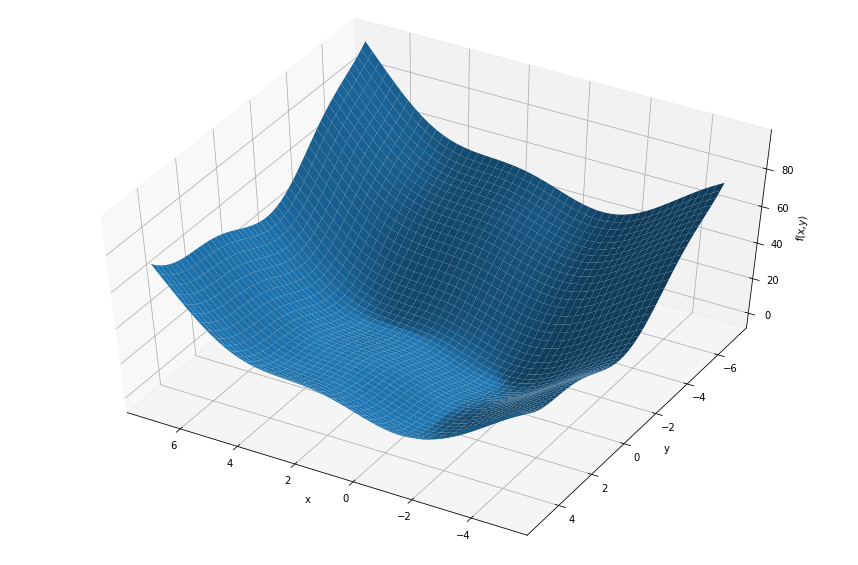

In [4]:
x = np.linspace(-5, 7, 1000) # создаем массив из 1000 равноудаленых в промежутке от -5 до 7
y = np.linspace(-7, 5, 1000) # создаем массив из 1000 равноудаленых в промежутке от -7 до 5

X, Y = np.meshgrid(x, y) # создаем "сетку" для рисунка
zs = np.array(f(X.reshape(-1), Y.reshape(-1))) # находим результат функции f для каждого элемента сетки
Z = zs.reshape(X.shape) # меняем размер массива zs

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.view_init(50, 120)
plt.show()

In [5]:
def optimize_2d(f, df_x, df_y, learning_rate, start_point=[2.5, 2.0], stop_eps = 1e-10, compute_learning_rate=None):
    '''
    Function to calculate and show minimum search by gradient descent.
    
    Args:
        f (function): function to find min
        df_x (function): derivative of initial function by x
        df_y (function): derivative of initial function by y 
        learning_rate (float, int): initial learning rate for gradient descent
        stop_eps (float, int): stop criteria
        compute_learning_rate (function): function to recalculate learning rate
        
    Output:
        x1_list (list): list of ending points for first variable
        x2_list (list): list of ending points for second variable
        y_list (list): list of function value at ending points
    '''
    
    x1_list, x2_list, y_list = [start_point[0]], [start_point[1]], [f(start_point[0], start_point[1])]
    start_point_old = []
    start_point_old.append(start_point[0]+stop_eps*1000)
    start_point_old.append(start_point[1]+stop_eps*1000)
    
    while abs(start_point[0] - start_point_old[0]) > stop_eps and abs(start_point[1] - start_point_old[1]) > stop_eps: 
        
        start_point_old[0] = start_point[0]
        start_point_old[1] = start_point[1]
        
        direction_1 = -df_x(start_point_old[0])
        direction_2 = -df_y(start_point_old[1])
        
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(learning_rate)
            
        start_point[0] = start_point_old[0] + learning_rate * direction_1
        start_point[1] = start_point_old[1] + learning_rate * direction_2
        x1_list.append(start_point[0])
        x2_list.append(start_point[1])
        y_list.append(f(start_point[0], start_point[1]))
        
        
    print("Local min:", start_point)
    
    X, Y = np.meshgrid(x, y)
    zs = np.array(f(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)
    
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, alpha=0.7)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.view_init(50, 120)
    ax.scatter3D(x1_list, x2_list, y_list, c='r', marker='o', edgecolors='face', s=20, alpha=1)

    plt.show()
    
    return x1_list, x2_list, y_list

Local min: [-1.1056550364033655, -1.1105105036023977]


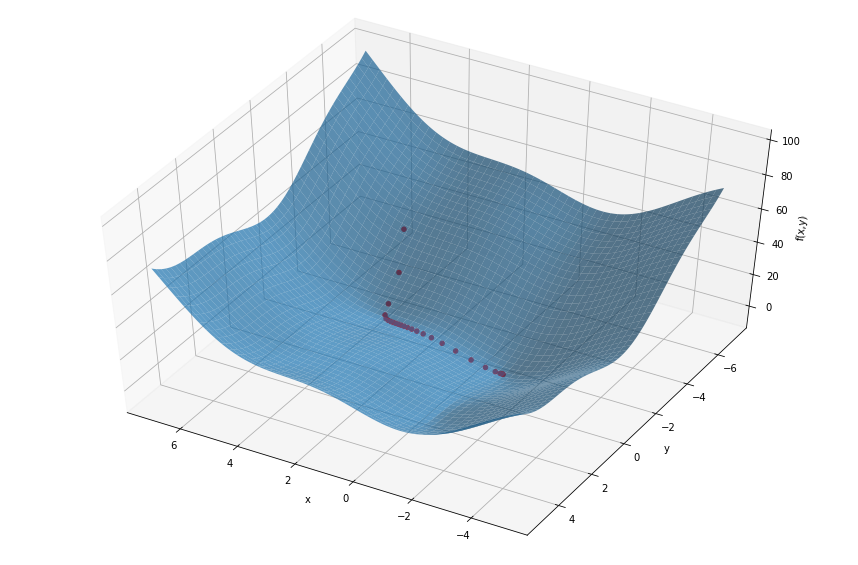

In [6]:
_ = optimize_2d(f, df_x, df_y, 0.1, start_point=[4, -4])

### Проблеммы градиентного спуска:

Давайте возьмем простую функцию для примера: $f(x) = x ^ 2 - 20sin(x)$

Её производная равна: $\frac{df}{dx} = 2x - 20cos(x)$

Мы будем аналогично предыдущему пункту визуализировать алгоритм градиентного спуска при помощи библиотеки `Matplotlib`:

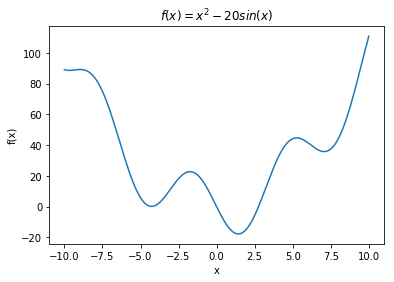

In [7]:
f = lambda x: x ** 2 - 20 * np.sin(x)
df = lambda x: 2 * x - 20 * np.cos(x)

x = np.linspace(-10, 10, 1000)
plt.title('$f(x) = x^2 - 20sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, f(x))
plt.show()

In [8]:
def optimize_1d(f, df, learning_rate, start_point=7, stop_eps = 0.05, compute_learning_rate=None):
    '''
    Function to calculate and show minimum search by gradient descent.
    
    Args:
        f (function): function to find min
        df (function): derivative of initial function to find min
        learning_rate (float, int): initial learning rate for gradient descent
        start_point (float, int): starting point for gradient descent 
        stop_eps (float, int): stop criteria
        compute_learning_rate (function): function to recalculate learning rate
        
    Output:
        x_list (list): list of ending points
        y_list (list): list of function value at ending points
    '''
    
    x_list, y_list = [start_point], [f(start_point)]
    start_point_old = np.inf

    while abs(start_point - start_point_old) > stop_eps: 
        
        start_point_old = start_point
        direction = -df(start_point_old)
        
        if compute_learning_rate is not None:
            learning_rate = compute_learning_rate(learning_rate)
            
        start_point = start_point_old + learning_rate * direction
        x_list.append(start_point)
        y_list.append(f(start_point))

        
    print("Минимум =", start_point)
    print("Кол-во шагов =", len(x_list)-1)
    
    plt.scatter(x_list, y_list, c="r")
    plt.plot(x_list, y_list, c="r")
    plt.plot(x, f(x), c="b")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Траектория градиентного спуска")
    
    return x_list, y_list

Перейдем непосредственно к проблемам с которыми вы можете столкнуться, при использовании алгоритма градиентного спуска. Если функция не выпуклая, то градиентный спуск может сходится к локальному минимуму, а не к глобальному:

Минимум = -4.33106152319398
Кол-во шагов = 8


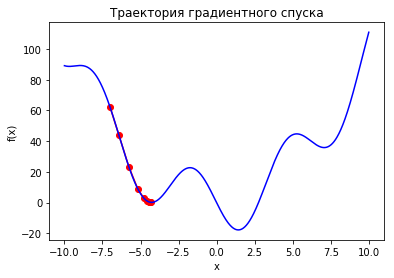

In [9]:
x_list, y_list = optimize_1d(f, df, learning_rate=0.02, start_point=-7)

Если функция не выпуклая, то при неудачном шаге градиентный спуск может сходится максимуму О_о (это редкая ситуация, но возможная):

Минимум = 5.268358275007972
Кол-во шагов = 2


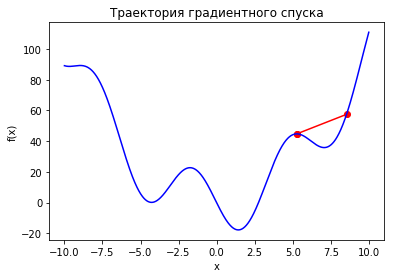

In [10]:
x_list, y_list = optimize_1d(f, df, learning_rate=0.11, start_point=8.54)

При слишком высоком множителе (learning_rate) градиентный спуск может расходится или сходится вне точки глобального минимума:

Минимум = -8.964122065469992
Кол-во шагов = 224


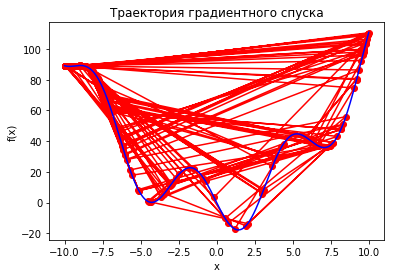

In [11]:
x_list, y_list = optimize_1d(f, df, learning_rate=0.5, start_point=3)

Если все параметры подоброны удачно, то градиентный спуск сходится к глобальному минимуму. Например, в данном случае мы воспользовались маленькой популярной хитростью: при каждом последующем шаге мы уменьшаем learning_rate. Такой подход приводит к тому, что сначала перед антиградиентом стоит большой коэффициент (в примере, `0.15`), но с каждым шагом он уменьшается. На втором шаге перед антиградиентом коэффициент равен `0.15*0.9=0.135`, на третьем - `0.15*0.9*0.9=0.1215`, и так далее:

Минимум = 1.4297699594309685
Кол-во шагов = 10


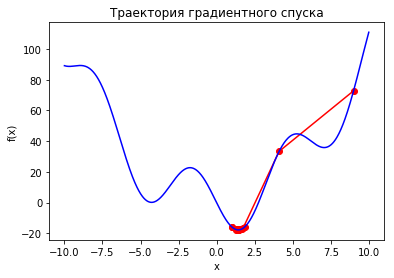

In [12]:
x_list, y_list = optimize_1d(f, df, learning_rate=0.15, start_point=9, compute_learning_rate = lambda x: x * 0.9)

### Решение задачи регрессии:

Задача регрессии - предсказать значение целевой переменной по признаку (набору признаков):

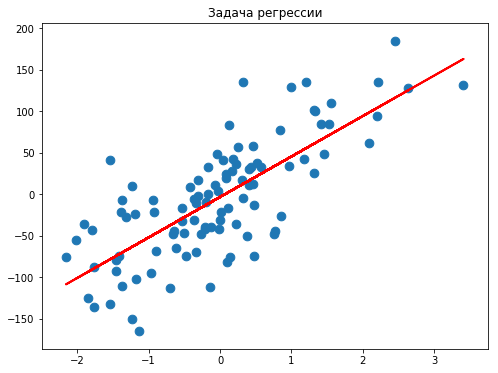

In [13]:
X, Y = make_regression(n_samples=100, n_features=2)

model_reg = LinearRegression().fit(X[:, 0].reshape(-1, 1), Y)
y_pred = model_reg.predict(X[:, 0].reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.title("Задача регрессии")
plt.plot(X[:, 0], y_pred, color='red', linewidth=2)
plt.scatter(X[:, 0], Y, marker='o', s=75)

Для того чтобы познакомиться с задачей регрессии мы будем пытаться спрогнозировать стоимость продажи дома в зависимости от его характеристик. Доступные нам данные представлены ниже. Датасет состоит из 15 тысяч наблюдений.

* `date` – дата продажи дома (string)
* `bedrooms` – кол-во спальных комнат (float32)
* `bathrooms` – кол-во ванных комнат по отношению к спальням (float32)
* `sqft_living` – площадь дома в кв. метрах (int32)
* `sqft_lot` – площадь участка в кв. метрах (int32)
* `floors` – кол-во этажей в доме (float32)
* `waterfront` – есть ли вид на берег (bool)
* `condition` – состояние дома (int32)
* `grade` – состояние дома и участка (int32)
* `sqft_above` – площадь дома отдельно без подвала (int32)
* `sqft_basement` – квадратные метры подвала (int32)
* `yr_built` – год постройки (int32)
* `yt_renovated` – год реновации (int32)
* `zipcode` – зип-код (int32)
* `lat` – координата по широте (float32)
* `long` – координата по долготе (float32)
* `price` – стоимость продажи дома (float32)

Загружаем данные при помощи уже известной нам библиотеки `pandas`. Заметим, что считывать csv-файлы можно и со сторонних интернет-ресурсов. В домашних работах и при выполнении проектов рекомендуется пользоваться аналогичным подходом.

In [256]:
df = pd.read_csv('https://raw.githubusercontent.com/Skvidvardin/Fun/master/train_houses.csv')

Проверим наличие пропусков в колонках:

In [211]:
df.isnull().any()

date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
price            False
dtype: bool

Проведем экспресс-анализ данных:

In [210]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
0,2014-09-16,5,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.6101,-122.047,635000
1,2014-11-18,3,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.5094,-122.376,456700
2,2014-11-10,3,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.4303,-122.046,234000
3,2015-04-16,4,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.4292,-122.328,415000
4,2014-07-23,3,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.6074,-122.294,552500


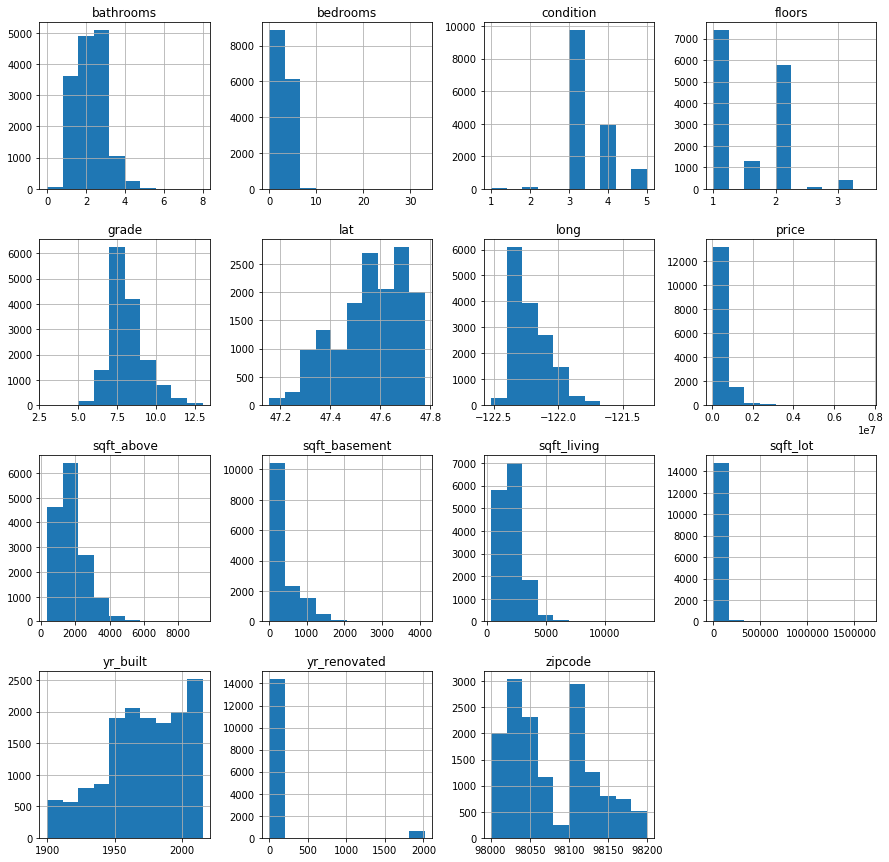

In [212]:
_ = df.drop('date', axis=1).drop('waterfront', axis=1).hist(figsize=(15, 15))

Во-первых, таблица содержит абсолютно мультиколлинеарные столбцы `sqft_living`, `sqft_above`, `sqft_above`. Один из них необходимо удалить из выборки.

In [213]:
np.any(df['sqft_living'] != df['sqft_above']+df['sqft_basement'])

False

In [214]:
df = df.drop('sqft_living', axis=1)

Во-вторых, можно заметить, что вместо `NaN` в столбце `yr_renovated` используется значение 0. В данном случае имеется множество способов это исправить. Мы заменим год постройки (`yr_built`) на год реновации (`yr_renovated`), если реновация осуществлялась. Затем удалим столбец `yr_renovated`:

In [218]:
mask = df.yr_renovated > 0
df.loc[mask, 'yr_built'] = df.yr_renovated

In [226]:
df = df.drop('yr_renovated', axis=1)

В-третьих, столбец `date` не несет значительной информации, поэтому мы просто его удалим:

In [227]:
df = df.drop('date', axis=1)

Итоговые данные для обучения модели:

In [228]:
df.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,price
0,5,3.25,34200,2.0,False,3,8,2510,1200,1986,98074,47.6101,-122.047,635000
1,3,1.75,8879,1.0,False,5,7,1540,1280,1957,98146,47.5094,-122.376,456700
2,3,1.00,239144,1.0,False,3,6,1240,0,1992,98038,47.4303,-122.046,234000
3,4,2.50,8279,2.0,False,3,7,2670,0,1999,98148,47.4292,-122.328,415000
4,3,2.25,4025,2.0,False,4,8,1760,940,1907,98122,47.6074,-122.294,552500


Для того чтобы у нас была возможность проверить модели, выборку необходимо разбить на `test` и `train`. На `train` мы будем обучать модели, а на `test` проводить проверки качаства работы. В противном случае, существует вероятность переобучения.

In [230]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], 
                                                    test_size=0.3, random_state=42)

Обучим линейную регрессию:

In [232]:
lr = LinearRegression()

In [233]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Построим предсказания для тестовой выборки:

In [241]:
pred = lr.predict(X_test)

Посчитаем среднию ошибку предсказаний по модулю:

In [248]:
mean_absolute_error(pred, y_test)

130278.88658444384

In [251]:
y_test.describe()

count    4.500000e+03
mean     5.385700e+05
std      3.575880e+05
min      8.300000e+04
25%      3.229920e+05
50%      4.490000e+05
75%      6.373875e+05
max      4.489000e+06
Name: price, dtype: float64

## (Опционально) Введение в NumPy:

Основным объектом NumPy является однородный многомерный массив. Это набор элементов, проиндексированных натуральными числами. Размерности массивов в NumPy называются осями. Как и в Pandas, массивы можно получить из других структур данных. Например из листа листов (в примере) или из таблицы Pandas. 

In [87]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

Также массивы можно создать при помощи стандартных функций NumPy.

In [88]:
ones = np.ones((2, 3, 4)) # 3 оси: нулевая ось - 2 элемента, первая - 3, вторая - 4
ones

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [89]:
ints = np.random.randint(low=3, high=10, size=(2, 3, 4))
ints

array([[[7, 7, 7, 3],
        [4, 8, 7, 3],
        [8, 9, 5, 5]],

       [[9, 7, 4, 7],
        [4, 8, 6, 6],
        [9, 3, 5, 7]]])

<img src='https://cdn-images-1.medium.com/max/2400/1*Ikn1J6siiiCSk4ivYUhdgw.png' align='center' width="70%">

### Стандартные атрибуты массивов NumPy:

Можно посмотреть **количество осей (размеров)** созданного нами массива:

In [92]:
ints.ndim

3

Можно посмотреть **размеры** созданного нами массива:

In [93]:
ints.shape

(2, 3, 4)

Можно посмотреть **кол-во элементов** созданного нами массива:

In [94]:
ints.size

24

Можно посмотреть **тип данных элементов** созданного нами массива:

In [95]:
ints.dtype

dtype('int64')

### Стандартные методы для массивов NumPy:

Изменить размерность массива:

In [123]:
ran = np.arange(1, 7)
ran

array([1, 2, 3, 4, 5, 6])

In [125]:
ran = ran.reshape((2, 3))
ran

array([[1, 2, 3],
       [4, 5, 6]])

Сумма элементов массива:

In [126]:
ran.sum()

21

In [127]:
ran.sum(axis=1)

array([ 6, 15])

Транспонирование массива (2, 3, 4) -> (4, 3, 2):

In [105]:
ints.transpose()

array([[[7, 9],
        [4, 4],
        [8, 9]],

       [[7, 7],
        [8, 8],
        [9, 3]],

       [[7, 4],
        [7, 6],
        [5, 5]],

       [[3, 7],
        [3, 6],
        [5, 7]]])

Выборочная дисперсия элементов массива (c 1 элементом свободы):

In [112]:
ints.var(ddof=1)

3.7971014492753628

### Операции над массивами NumPy:

In [135]:
ran_one = np.arange(1, 7).reshape((2, 3))
ran_two = np.arange(3, 9).reshape((2, 3))
print(ran_one)
print()
print(ran_two)

[[1 2 3]
 [4 5 6]]

[[3 4 5]
 [6 7 8]]


Поэлементное сложение:

In [133]:
ran_one + ran_two

array([[ 4,  6,  8],
       [10, 12, 14]])

Поэлементное умножение:

In [136]:
ran_one * ran_two

array([[ 3,  8, 15],
       [24, 35, 48]])

Поэлементное возведение в степень:

In [137]:
ran_one**2

array([[ 1,  4,  9],
       [16, 25, 36]])

Применение функции синуса/косинуса к элементам массива:

In [138]:
np.sin(ran)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ]])

Наложение условия на элементы массива:

In [139]:
ran<5

array([[ True,  True,  True],
       [ True, False, False]])

Матричное умножение:

In [142]:
ran_one @ ran_two.transpose()

array([[ 26,  44],
       [ 62, 107]])

Взятие экспоненты от элементов массива:

In [144]:
np.exp(ran)

array([[  2.71828183,   7.3890561 ,  20.08553692],
       [ 54.59815003, 148.4131591 , 403.42879349]])

Наибольший элемент массива:

In [145]:
ran.max()

6

Наименьший элемент массива:

In [146]:
ran.min()

1